In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [35]:
df = pd.read_csv(r'D:\git_space\data\grade.csv')
df

,name,midterm,final,attendance,attitude,homework,grade
0,Ronaldo,90,94,10,8,8,2
1,Son,85,90,10,9,8,2
2,Messi,98,97,10,9,10,2
3,Dybala,75,70,8,8,9,1
4,Griezmann,70,65,8,7,7,1
5,Benzema,82,90,8,7,7,2
6,Neymar,95,91,7,5,8,2
7,Mbappe,90,97,9,9,9,2
8,Sancho,64,70,7,8,9,1
9,Pogba,59,45,4,5,6,0


In [36]:
df.drop('name', axis=1, inplace=True)

In [37]:
features = df.drop('grade', axis=1, inplace=False)
target = df['grade']

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(features) # data 정규화
pca = PCA(n_components=2)
pca.fit(df_scaled, target)
df_pca = pca.transform(df_scaled)

In [39]:
kmeans = KMeans(n_clusters=2, max_iter=3000)
cluster_labels = kmeans.fit_predict(features)

In [40]:
df['cluster'] = kmeans.labels_
df['component1'] = df_pca[:, 0]
df['component2'] = df_pca[:, 1]
df

,midterm,final,attendance,attitude,homework,grade,cluster,component1,component2
0,90,94,10,8,8,2,0,-1.597334,-0.930687
1,85,90,10,9,8,2,0,-1.629745,-0.471866
2,98,97,10,9,10,2,0,-2.692360,0.106330
3,75,70,8,8,9,1,0,-0.612487,0.452322
4,70,65,8,7,7,1,0,0.463126,-0.586487
5,82,90,8,7,7,2,0,-0.348063,-1.312913
6,95,91,7,5,8,2,0,-0.283066,-1.575013
7,90,97,9,9,9,2,0,-1.983346,-0.151721
8,64,70,7,8,9,1,0,-0.154728,0.703369
9,59,45,4,5,6,0,1,2.806838,-0.701316


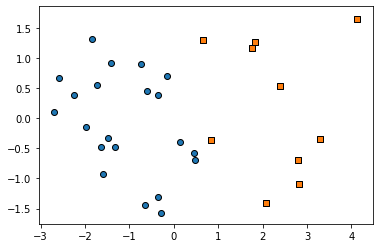

In [41]:
df['KMeans_label'] = cluster_labels
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's']

for label in unique_labels:
    label_cluster = df[df['KMeans_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
plt.show()